# Loading

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(50000, 2)

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: xlabel='sentiment'>

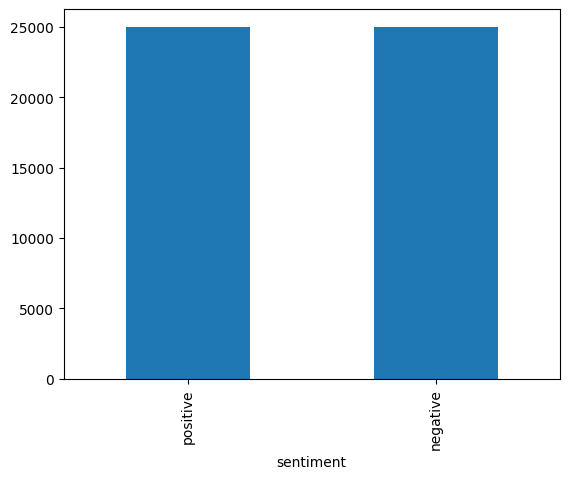

In [5]:
df.sentiment.value_counts().plot(kind = 'bar')

In [6]:
df.review[10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn\'t find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"'

Presence of `<br>`, `comma(,)`, `capital alphabets`, `Single(') and Double(") Apostrophes` observed

# Cleaning

### Removing unwanted characters

In [7]:
df['review'] = df.review.replace("<br />", "", regex=True).replace("[^a-zA-Z0-9 ]", "", regex=True)

### Labeling sentiment in binary

In [8]:
df['sentiment'] = df.sentiment.map({'positive': 1, 'negative': 0})

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The filming tech...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically theres a family where a little boy J...,0
4,Petter Matteis Love in the Time of Money is a ...,1


# Stemming

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [11]:
stopwords_english = stopwords.words('english')
stemmer = PorterStemmer()

def stem(review):
    try:
        return [
            stemmer.stem(word)
            for word in word_tokenize(review)
            if word not in stopwords_english
        ]
    except:
        return np.NaN

In [12]:
df['stem'] = df['review'].apply(stem)

In [14]:
df.head()

,review,sentiment,stem
0,One of the other reviewers has mentioned that ...,1,"[one, review, mention, watch, 1, oz, episod, y..."
1,A wonderful little production The filming tech...,1,"[a, wonder, littl, product, the, film, techniq..."
2,I thought this was a wonderful way to spend ti...,1,"[i, thought, wonder, way, spend, time, hot, su..."
3,Basically theres a family where a little boy J...,0,"[basic, there, famili, littl, boy, jake, think..."
4,Petter Matteis Love in the Time of Money is a ...,1,"[petter, mattei, love, time, money, visual, st..."


# Vectorizing

In [13]:
from gensim.models import Word2Vec

In [15]:
vectorizer = Word2Vec(
    df['stem'],
    vector_size = 100,
    min_count = 1
)

In [16]:
len(vectorizer.wv.index_to_key)

181925

In [17]:
vectorizer.wv.most_similar('time')

[('way', 0.5391795039176941),
 ('twice', 0.5027369856834412),
 ('occas', 0.4968571066856384),
 ('movi', 0.49312925338745117),
 ('day', 0.4903274178504944),
 ('hour', 0.4782518446445465),
 ('one', 0.4760948121547699),
 ('opportun', 0.47326377034187317),
 ('glanc', 0.4718545079231262),
 ('katanafrom', 0.47183889150619507)]

### Sentence Vectorizing

In [19]:
def sentence_average(keys):
    vector_sum = np.array([0.0] * 100)
    
    for key in keys:
        vector_sum += np.array(vectorizer.wv.get_vector(key).tolist())
    
    return vector_sum / len(keys)

In [22]:
x = pd.DataFrame()
x[[str(i) for i in range(100)]] = df.apply(lambda row: sentence_average(row[2]), axis = 1, result_type = "expand")

In [23]:
x.shape

(50000, 100)

In [25]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.224086,0.124548,-0.560523,-0.280118,-0.347190,-0.669528,0.387310,0.308927,0.298159,-0.228007,...,0.595217,0.635776,0.343884,-0.018723,0.878769,-0.188055,0.028916,-0.691826,0.481183,-0.296126
1,-0.564464,0.356956,-0.855516,-0.186919,0.333399,-0.449246,0.284913,0.592180,0.314848,-0.311810,...,0.264220,0.541035,0.047024,-0.307434,1.486784,-0.291462,0.323980,-0.127526,0.177815,0.088189
2,-0.404502,-0.202063,-0.432939,-0.261218,-0.053913,-0.664073,0.360001,0.429876,-0.131980,-0.061973,...,0.522549,0.676358,0.046866,0.025495,1.049829,-0.170199,0.142993,-0.494416,0.505590,-0.258266
3,-0.386408,-0.021483,-0.766305,-0.319618,-0.247374,-0.613956,0.230997,0.207710,0.288456,-0.490740,...,0.584336,0.823562,0.285563,-0.219183,1.231067,-0.329971,-0.195295,-0.659005,0.545288,-0.616307
4,-0.479537,-0.228891,-0.955542,-0.275452,0.121603,-0.343834,0.303828,0.414734,0.507540,-0.086304,...,0.534609,0.502321,0.239422,0.139834,1.535233,-0.328742,0.115738,-0.273909,0.640233,-0.522307


In [26]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-0.357782,-0.055713,-0.585418,-0.290256,0.017274,-0.666192,0.424744,0.202211,0.176004,-0.247238,...,0.557878,0.674276,0.206508,-0.111757,1.262616,-0.180199,0.049589,-0.467771,0.460267,-0.386604
std,0.201517,0.222543,0.225167,0.197058,0.219094,0.265696,0.211725,0.285604,0.187581,0.143813,...,0.184465,0.229161,0.129169,0.167785,0.203204,0.167661,0.225187,0.208375,0.187050,0.204745
min,-1.664191,-1.240832,-2.160181,-1.619422,-0.844185,-1.973544,-0.790706,-1.397818,-1.128849,-1.228149,...,-0.427693,-0.223124,-0.661434,-1.306401,0.042776,-1.250860,-1.226282,-1.544755,-1.002429,-1.873882
25%,-0.488625,-0.198587,-0.728228,-0.419332,-0.130442,-0.840592,0.278219,0.018433,0.059032,-0.332190,...,0.437524,0.514657,0.125371,-0.215231,1.131094,-0.278000,-0.098934,-0.595193,0.342267,-0.522306
50%,-0.353631,-0.051612,-0.580155,-0.290110,0.003435,-0.654389,0.415947,0.219655,0.178676,-0.239958,...,0.557769,0.660442,0.205381,-0.106339,1.262120,-0.167962,0.054544,-0.452565,0.463311,-0.384131
75%,-0.223064,0.088947,-0.436885,-0.161091,0.148526,-0.478096,0.561817,0.404238,0.295431,-0.154098,...,0.678449,0.818430,0.285707,-0.002395,1.391761,-0.070830,0.201847,-0.327090,0.581628,-0.250172
max,0.652195,1.172972,0.811553,0.865171,1.517697,0.476949,1.574111,1.363062,1.373078,0.562030,...,1.579512,1.913835,0.986538,0.802429,2.334129,1.043303,1.115096,0.399779,1.507849,0.884437


# Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [39]:
x_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.663457,0.810013,0.110563,0.051447,-1.663520,-0.012559,-0.176807,0.373655,0.651219,0.133722,...,0.202425,-0.168003,1.063549,0.554486,-1.888986,-0.046855,-0.091802,-1.075258,0.111824,0.441910
1,-1.025638,1.854351,-1.199555,0.524402,1.442885,0.816526,-0.660440,1.365430,0.740187,-0.449009,...,-1.591956,-0.581432,-1.234701,-1.166249,1.103176,-0.663623,1.218516,1.632867,-1.510045,2.318975
2,-0.231840,-0.657635,0.677191,0.147359,-0.324919,0.007974,-0.305787,0.797142,-1.641896,1.288244,...,-0.191521,0.009088,-1.235925,0.818033,-1.047169,0.059647,0.414788,-0.127868,0.242306,0.626823
3,-0.142050,0.153812,-0.803352,-0.149005,-1.207929,0.196602,-0.915093,0.019256,0.599493,-1.693200,...,0.143433,0.651451,0.612037,-0.640272,-0.155257,-0.893308,-1.087481,-0.917745,0.454541,-1.121914
4,-0.604194,-0.778188,-1.643789,0.075125,0.476188,1.213267,-0.571102,0.744126,1.767450,1.119053,...,-0.126143,-0.750372,0.254819,1.499499,1.341605,-0.885981,0.293755,0.930363,0.962137,-0.662798


In [ ]:
y = df['sentiment']

In [35]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    0
 4    1
 Name: sentiment, dtype: int64,
 sentiment
 1    25000
 0    25000
 Name: count, dtype: int64)

# Training Simple Artificial Neural Network

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [46]:
model = Sequential()
model.add(Dropout(rate=0.1))
model.add(Dense(units=80, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=20, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_scaled, y, validation_split=0.33, batch_size=64, epochs=200)

Epoch 1/200
524/524 [==============================] - 2s 3ms/step - loss: 0.4211 - accuracy: 0.8111 - val_loss: 0.3507 - val_accuracy: 0.8528
Epoch 2/200
524/524 [==============================] - 1s 3ms/step - loss: 0.3617 - accuracy: 0.8436 - val_loss: 0.3425 - val_accuracy: 0.8535
Epoch 3/200
524/524 [==============================] - 2s 3ms/step - loss: 0.3533 - accuracy: 0.8468 - val_loss: 0.3365 - val_accuracy: 0.8572
Epoch 4/200
524/524 [==============================] - 2s 3ms/step - loss: 0.3483 - accuracy: 0.8487 - val_loss: 0.3332 - val_accuracy: 0.8583
Epoch 5/200
524/524 [==============================] - 2s 3ms/step - loss: 0.3443 - accuracy: 0.8518 - val_loss: 0.3340 - val_accuracy: 0.8596
Epoch 6/200
524/524 [==============================] - 2s 3ms/step - loss: 0.3408 - accuracy: 0.8525 - val_loss: 0.3310 - val_accuracy: 0.8604
Epoch 7/200
524/524 [==============================] - 1s 3ms/step - loss: 0.3360 - accuracy: 0.8537 - val_loss: 0.3377 - val_accuracy: 0.8591

# Testing

In [55]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_scaled)
y_pred = (y_pred > 0.5)

accuracy_score(y, y_pred)

1563/1563 [==============================] - 2s 1ms/step


0.91384

# Saving

In [61]:
import pickle as pkl

In [64]:
pkl.dump(vectorizer, open('assets/vectorizer.pkl', 'wb'))
pkl.dump(scaler, open('assets/scaler.pkl', 'wb'))
pkl.dump(model, open('assets/model.pkl', 'wb'))